In [20]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import reverse_geocoder as rg
import geopandas as gpd
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Data Reading

In [3]:
#Reading data
data = pd.read_csv('weather-alerts-challenge.csv')
data.head(5)

,id,BLat,BLon,ELat,ELon,Report Source,Magnitude,Injuries Direct/Indirect,Deaths Direct/Indirect,Event Narrative,Event,Episode Narrative,Rainfall,Windspeed,IsPropertyDamage
0,0,43.49,-93.35,43.49,-93.35,Trained Spotter,1.25 in.,0/0,"0/0 (fatality details below, when available...)",NaN,Hail,A surface low pressure tracked east across Iow...,5.44,46.88 mph,1
1,1,43.41,-93.27,43.41,-93.27,Trained Spotter,57 kts.,0/0,"0/0 (fatality details below, when available...)",NaN,Thunderstorm Wind,A surface low pressure tracked east across Iow...,9.56,10.76 mph,1
2,2,43.50,-93.73,43.50,-93.73,Public,2.75 in.,0/0,"0/0 (fatality details below, when available...)",NaN,Hail,A surface low pressure tracked east across Iow...,12.09,1.7728 mph,1
3,3,41.54,-93.07,41.54,-93.07,Trained Spotter,0.88 in.,0/0,"0/0 (fatality details below, when available...)",NaN,Hail,A cold front dropped southeast through Iowa du...,0.70,4.04 mph,1
4,4,41.76,-92.70,41.76,-92.70,Trained Spotter,0.75 in.,0/0,"0/0 (fatality details below, when available...)",NaN,Hail,A cold front dropped southeast through Iowa du...,0.06,0.775 mph,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24495 entries, 0 to 24494
Data columns (total 15 columns):
id                          24495 non-null int64
BLat                        24495 non-null float64
BLon                        24495 non-null float64
ELat                        24495 non-null float64
ELon                        24495 non-null float64
Report Source               24495 non-null object
Magnitude                   20102 non-null object
Injuries Direct/Indirect    24495 non-null object
Deaths Direct/Indirect      24495 non-null object
Event Narrative             15082 non-null object
Event                       24495 non-null object
Episode Narrative           24495 non-null object
Rainfall                    24495 non-null float64
Windspeed                   24495 non-null object
IsPropertyDamage            24495 non-null int64
dtypes: float64(5), int64(2), object(8)
memory usage: 2.8+ MB


In [5]:
data.describe()

,id,BLat,BLon,ELat,ELon,Rainfall,IsPropertyDamage
count,24495.000000,24495.000000,24495.000000,24495.000000,24495.000000,24495.000000,24495.000000
mean,12247.000000,38.125818,-91.156493,38.124773,-91.148513,5.230982,0.267402
std,7071.241758,5.413915,11.003217,5.414352,11.003733,34.655874,0.442613
min,0.000000,-14.300000,-170.600000,-14.400000,-170.700000,0.000000,0.000000
25%,6123.500000,34.200000,-98.990050,34.200000,-98.990000,0.040000,0.000000
50%,12247.000000,38.500000,-91.613400,38.500000,-91.601000,0.070000,0.000000
75%,18370.500000,42.030000,-82.641150,42.030000,-82.633350,0.320000,1.000000
max,24494.000000,64.513100,-64.700000,64.280600,-64.700000,2046.020000,1.000000


# EDA

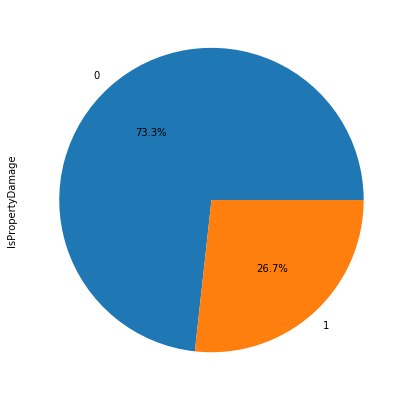

In [7]:
#Target Variable disribution
data['IsPropertyDamage'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))

Text(0.5, 0, 'Event')

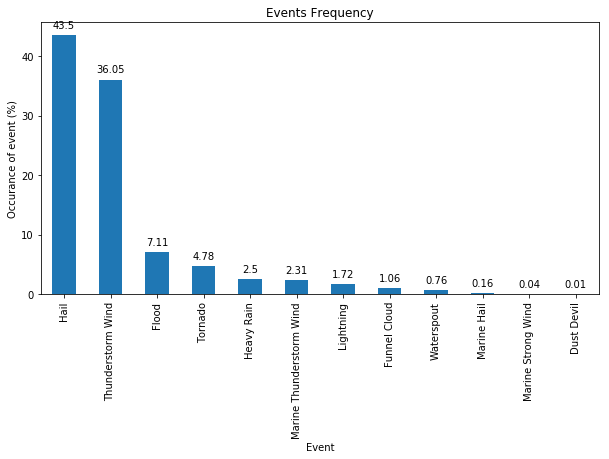

In [8]:
#Event Frequency
event=data['Event'].value_counts()
ax = ((event/event.sum())*100).sort_values(ascending=False).plot(kind='bar',
                 figsize=(10,5),title='Events Frequency')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylabel("Occurance of event (%)")
ax.set_xlabel("Event")

Text(0, 0.5, 'Damage Percentage')

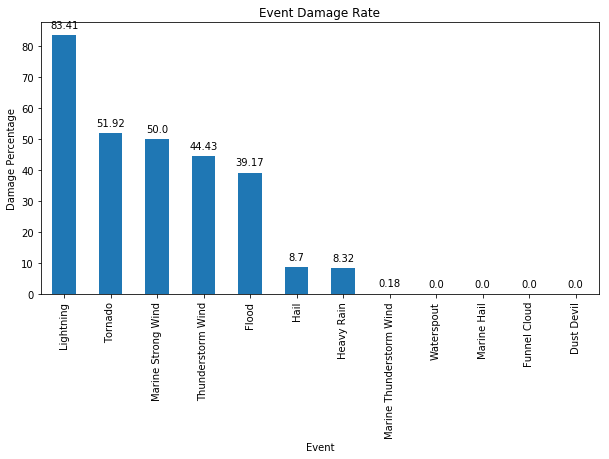

In [9]:
#Event Damage Rate
ax = (data.groupby('Event')['IsPropertyDamage'].mean().sort_values(ascending=False)*100).plot(kind='bar',
                 figsize=(10,5),title='Event Damage Rate')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylabel("Damage Percentage")

Text(0, 0.5, 'Number of Times Event Reported by Source(%)')

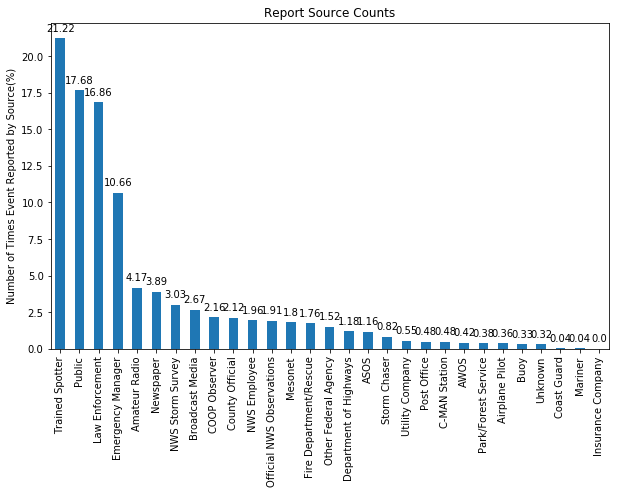

In [10]:
#Report Source Count
source=data['Report Source'].value_counts()
ax = ((source/source.sum())*100).sort_values(ascending=False).plot(kind='bar',
                 figsize=(10,6),title='Report Source Counts')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylabel("Number of Times Event Reported by Source(%)")

Text(0, 0.5, 'Damage Percentage')

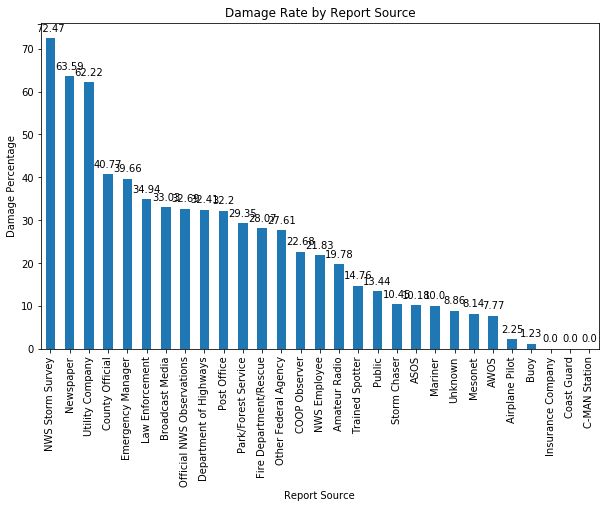

In [11]:
#Report Source Damage Rate
ax = (data.groupby('Report Source')['IsPropertyDamage'].mean().sort_values(ascending=False)*100).plot(kind='bar',
                 figsize=(10,6),title='Damage Rate by Report Source')
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
ax.set_ylabel("Damage Percentage")

## Feature Relationships

### Feature Relationship with target 

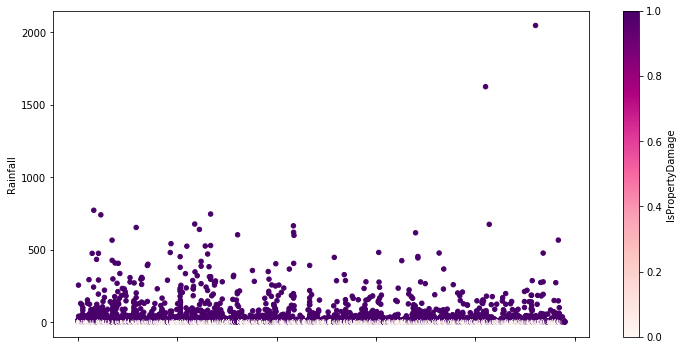

In [15]:
#Rainfall
data.plot.scatter(x='id', y='Rainfall', c='IsPropertyDamage',cmap='RdPu',figsize=(12,6))

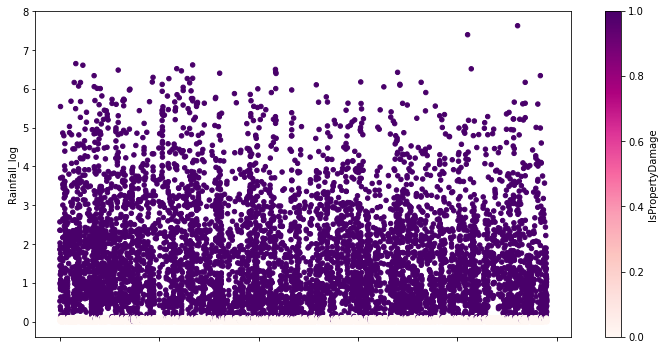

In [16]:
# Checking if log helps with scale
data['Rainfall_log'] = data['Rainfall'].apply(np.log1p)
data.plot.scatter(x='id', y='Rainfall_log', c='IsPropertyDamage',cmap='RdPu',figsize=(12,6))

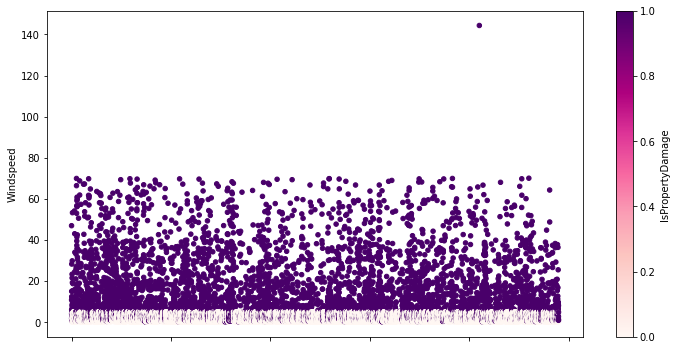

In [18]:
#Windspeed
#Converting windspeed to numeric
data['Windspeed'] = data['Windspeed'].apply(lambda x: float(x.split()[0]))
data.plot.scatter(x='id', y='Windspeed', c='IsPropertyDamage',cmap='RdPu',figsize=(12,6))

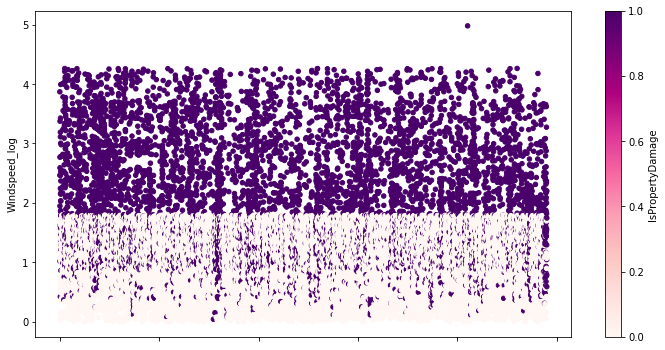

In [19]:
# Checking if log helps with scale
data['Windspeed_log'] = data['Windspeed'].apply(np.log1p)
data.plot.scatter(x='id', y='Windspeed_log', c='IsPropertyDamage',cmap='RdPu',figsize=(12,6))

Both 'Rainfall' and 'Windspeed' are linearly seperable.

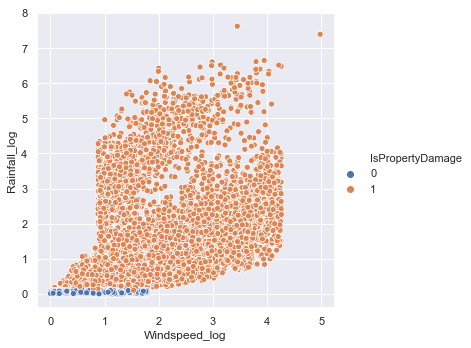

In [25]:
sns.relplot(x="Windspeed_log", y="Rainfall_log", hue="IsPropertyDamage", data=data)

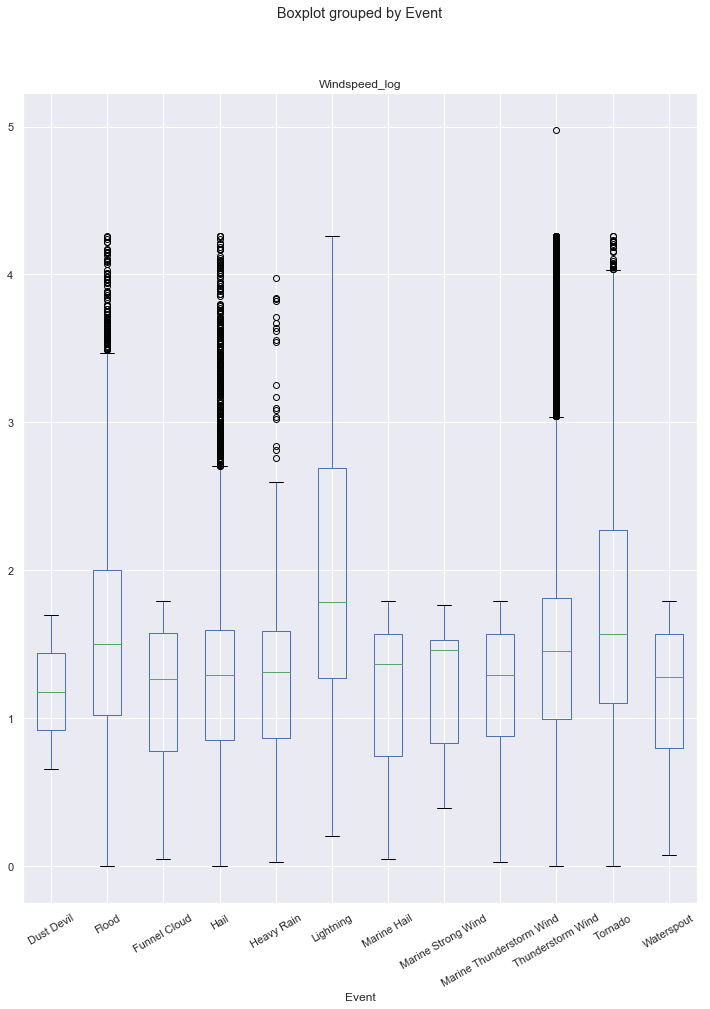

In [26]:
data.boxplot('Windspeed_log','Event',rot = 30)

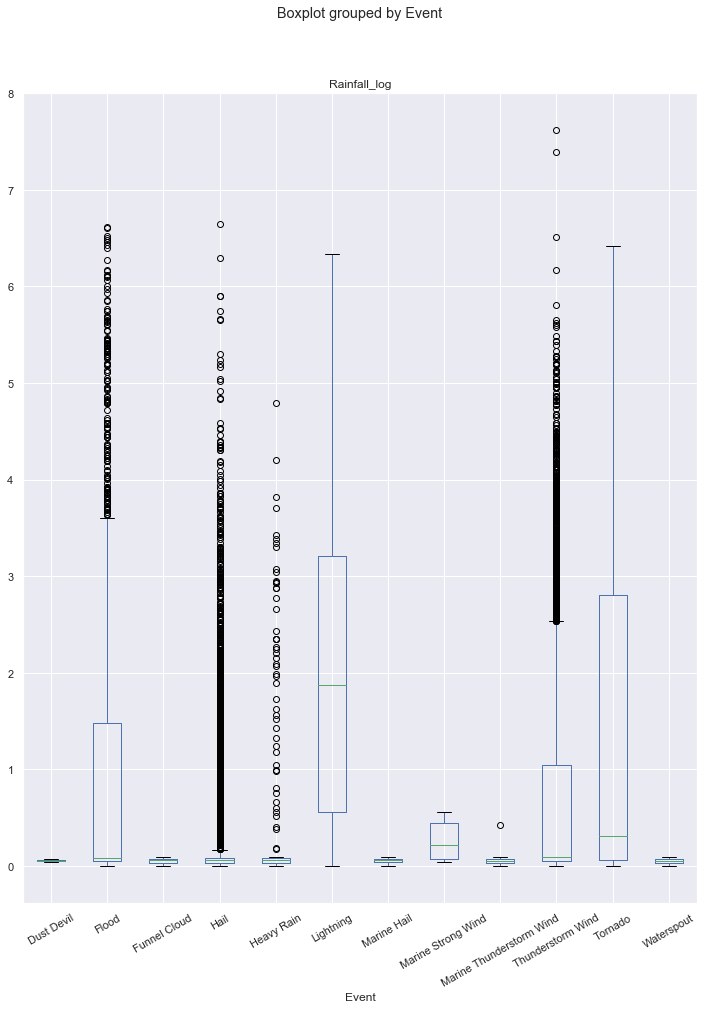

In [27]:
data.boxplot('Rainfall_log','Event',rot = 30)

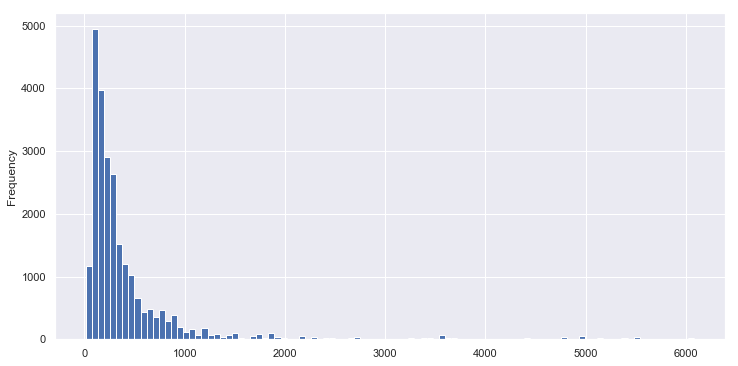

In [28]:
#Taking Episode Narrative Length
data['Episode Narrative len'] = data['Episode Narrative'].apply(len) 
data['Episode Narrative len'].plot(kind='hist',bins=100,figsize=(12,6))

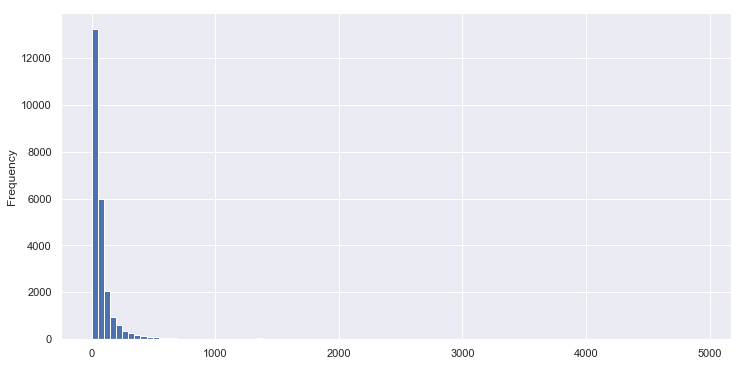

In [30]:
#Taking Event Narrative Length
data['Event Narrative']=data['Event Narrative'].fillna('')
data['Event Narrative len'] = data['Event Narrative'].apply(len)
data['Event Narrative len'].plot(kind='hist',bins=100,figsize=(12,6))

In [31]:
#Converting Magnitude into 3 different feature
def magnitude_feature(df):
    '''
    This function convert magnitude feature into 3 different feature.
    Whereever Magnitude unit is in. it assigns 1 to that otherwise 0.
    Similarly, when it is in kt. it creates a new feature assigns 1 or 0.
    If it is null assign 1 to that positions in a seperate column.
    '''
    mag = df.split()
    if len(mag)>0 and mag[1]=='kts.':
        x=0
        y = float(mag[0])
        z=0
    elif len(mag)>0 and mag[1]=='in.':
        x=float(mag[0])
        y=0
        z=0
    else:
        x,y,z =0, 0, 1
    return x,y,z

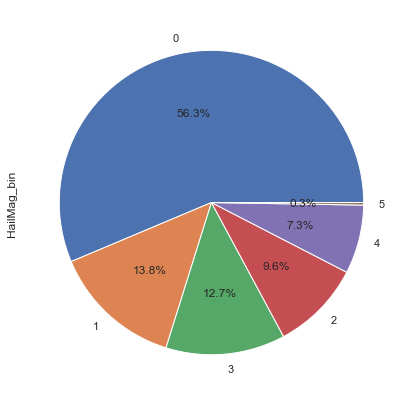

In [34]:
data['Magnitude']=data['Magnitude'].fillna('')
data['HailMag'],data['WindMag'],data['NonMagEvent']=zip(*data['Magnitude'].map(magnitude_feature))

#Data Binning
hail_bins = [0, 0.01, 0.75, 0.88, 1.25, 2.75, 5.5]
hail_labels = [0,1,2,3,4,5]
data['HailMag_bin'] = pd.cut(data['HailMag'], bins=hail_bins, labels=hail_labels,include_lowest =True)
data['HailMag_bin'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))

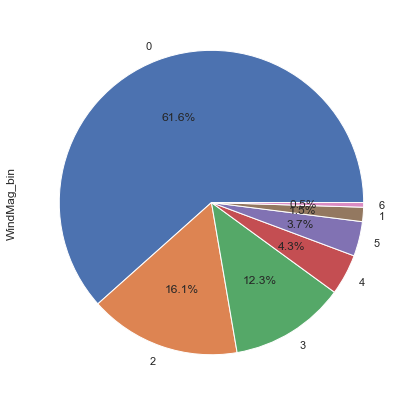

In [35]:
wind_bins = [0, 0.01, 40, 50, 55, 60, 70, 100]
wind_labels = [0,1,2,3,4,5,6]
data['WindMag_bin'] = pd.cut(data['WindMag'], bins=wind_bins, labels=wind_labels,include_lowest =True)
data['WindMag_bin'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))

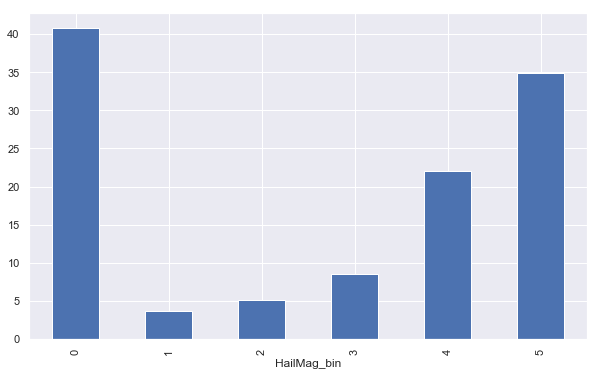

In [43]:
(data.groupby('HailMag_bin')['IsPropertyDamage'].mean()*100).plot(kind='bar',figsize=(10,6))

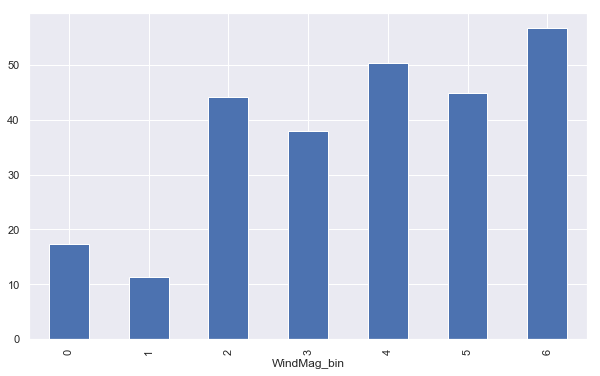

In [42]:
(data.groupby('WindMag_bin')['IsPropertyDamage'].mean()*100).plot(kind='bar',figsize=(10,6))

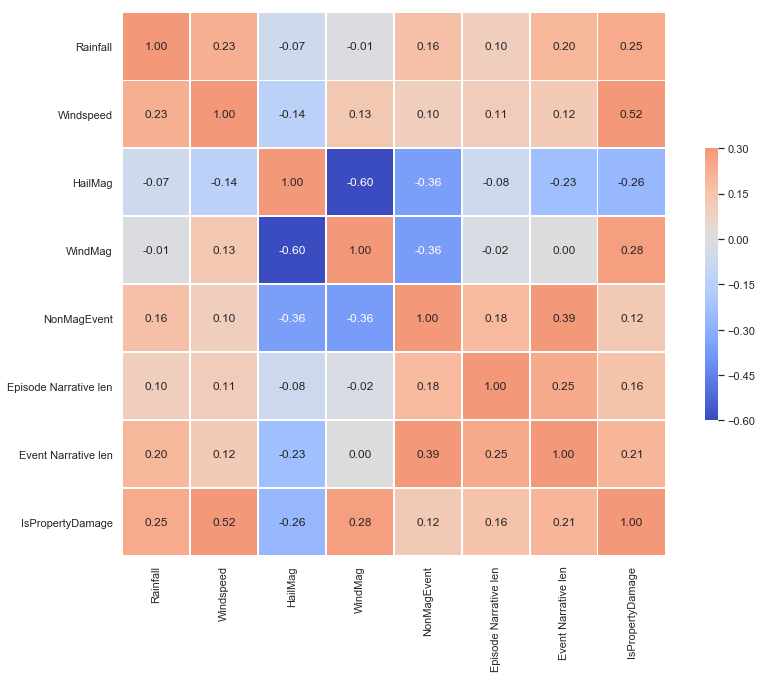

In [45]:
#HeatMap for correlation
num_df=data[['Rainfall','Windspeed','HailMag','WindMag','NonMagEvent','Episode Narrative len',
             'Event Narrative len','IsPropertyDamage']]
corr=num_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(14,10)

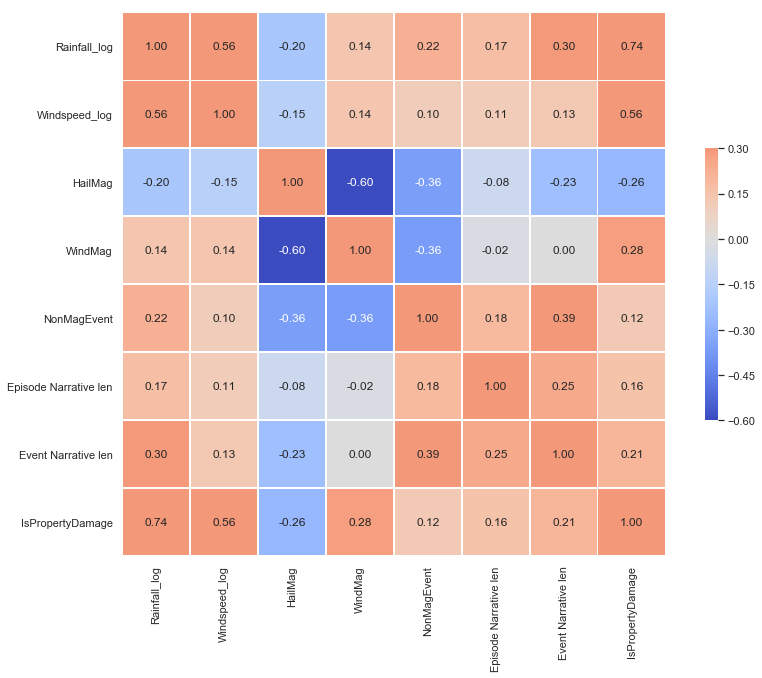

In [46]:
#HeatMap for correlation
num_df=data[['Rainfall_log','Windspeed_log','HailMag','WindMag','NonMagEvent','Episode Narrative len',
             'Event Narrative len','IsPropertyDamage']]
corr=num_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(14,10)

## Choropleth Maps

In [47]:
def getLocInfo(info):
    Bstate=[]
    Bcounty=[]
    Bcity=[]
    for i in info:
        Bstate.append(i['admin1'])
        Bcounty.append(i['admin2'])
        Bcity.append(i['name'])
    return Bstate,Bcounty,Bcity

In [48]:
#Reverse Geo-coding
BCoordinates=tuple(zip(data['BLat'], data['BLon']))
ECoordinates=tuple(zip(data['ELat'], data['ELon']))

BCoord_info = rg.search(BCoordinates) 
ECoord_info = rg.search(ECoordinates)

Bstate,Bcounty,Bcity = getLocInfo(BCoord_info)
Estate,Ecounty,Ecity = getLocInfo(ECoord_info)

data['Bstate'],data['Estate'],data['Bcounty'],data['Ecounty'],data['Bcity'],data['Ecity'] = Bstate,Estate,Bcounty,Ecounty,Bcity,Ecity
del Bstate,Bcounty,Bcity,Estate,Ecounty,Ecity,BCoordinates,ECoordinates,BCoord_info,ECoord_info

Loading formatted geocoded file...


In [ ]:
area = pd.read_csv('State_Areas.csv')

import string
area['Area (square miles, including water)'] = [float(n.split()[0]) for n in \
     [area['Area (square miles, including water)'][i].translate(str.maketrans('', '', string.punctuation))for i in range(len(area))]]

area['Area (square km, including water)'] = [float(n.split()[0]) for n in \
     [area['Area (square km, including water)'][i].translate(str.maketrans('', '', string.punctuation))for i in range(len(area))]]

data['StateArea']=np.nan
for m,i in enumerate(data['Bstate']):
    for k,j in enumerate(area['State']):
        if i==j:
            data['StateArea'][m]=area['Area (square miles, including water)'][k]

            data.to_csv('data-with-state-area.csv',index=False)